In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn import preprocessing
from google.colab import files
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor

Importo los Dataframes

In [442]:
oportunidades = pd.read_csv('/content/short_df_Encoded.csv')
oportunidades.drop(columns= {'Unnamed: 0'}, inplace=True)
test = pd.read_csv('/content/DataFrame_test_encoded.csv')
oportunidades.head()

,Region_APAC,Region_Americas,Region_EMEA,Region_Japan,Region_Middle East,Total_Amount,TRF,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr",Decision
0,0.0,0.0,1.0,0.0,0.0,15.635076,10.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,10.940740,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,11.336971,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,15.819943,14.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,16.407566,25.0,0.0,1.0,0.0


In [443]:
test.head()

,Unnamed: 0,Region_APAC,Region_Americas,Region_EMEA,Region_Japan,Region_Middle East,Opportunity_ID,Total_Amount,TRF,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr"
0,0,0.0,0.0,1.0,0.0,0.0,10689.0,11.905436,0.0,1.0,1.0
1,1,0.0,0.0,1.0,0.0,0.0,10690.0,11.787392,0.0,1.0,1.0
2,2,0.0,1.0,0.0,0.0,0.0,10691.0,9.954062,0.0,1.0,1.0
3,3,0.0,1.0,0.0,0.0,0.0,10692.0,12.338534,1.0,1.0,1.0
4,4,0.0,1.0,0.0,0.0,0.0,10693.0,8.657390,0.0,0.0,0.0


Hago el split del Dataframe de entrenamiento

In [444]:
X = oportunidades.loc[:,oportunidades.columns != 'Decision'].values
y = oportunidades.loc[:,'Decision'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [445]:
import warnings 
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn import neighbors
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
warnings.filterwarnings("ignore")



def classify_and_plot(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 41)
    n_neighbors = 10
    h = .02 

    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])

    rcParams['figure.figsize'] = 5, 5
    for weights in ['uniform', 'distance']:
      for distances in ['euclidean', 'manhattan', 'minkowski']:
        knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, metric=distances)
        knn.fit(X_train, y_train)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        fig = plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)   
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("k = %i, weights = '%s', metric = '%s'" % (n_neighbors, weights, distances))
        plt.show()
        fig.savefig(weights +'.png')

        y_expected  = y_test
        y_predicted = knn.predict(X_test)

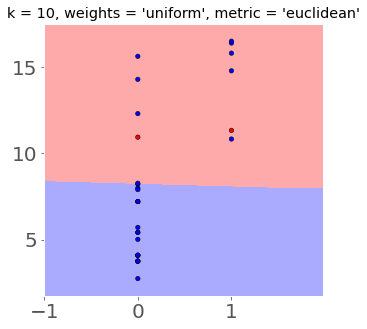

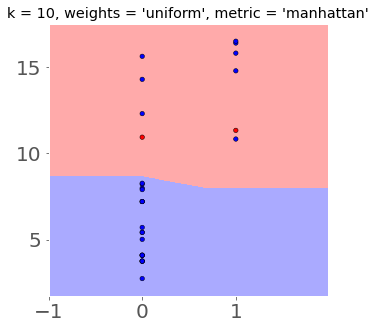

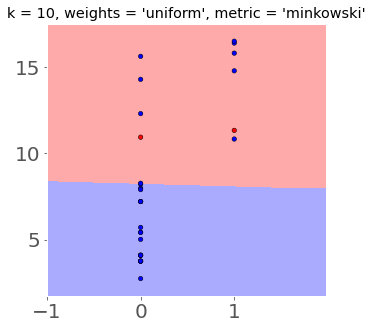

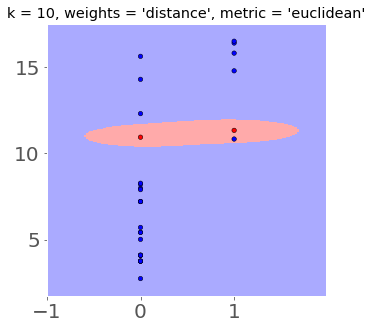

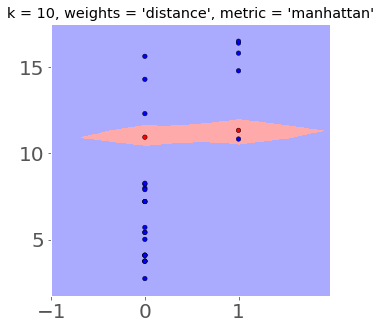

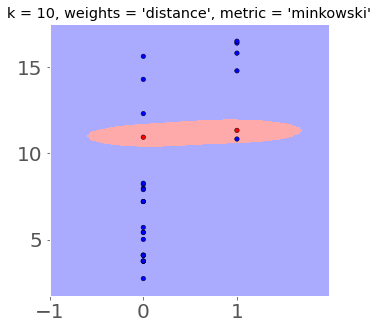

In [446]:
names = list(oportunidades.columns)

rows_nbr = 30 
X_prime  = np.array(oportunidades.iloc[:rows_nbr, [1,5]])
X        = X_prime # preprocessing.scale(X_prime)
y        = np.array(oportunidades.iloc[:rows_nbr, 8])

classify_and_plot(X, y)

Aplico KNN

In [447]:
n_neighbors = 43

knn = KNeighborsRegressor(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN  on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN  on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN  on training set: 0.61
Accuracy of K-NN  on test set: 0.58


In [448]:
pred = knn.predict(X_test)

In [449]:
loss = log_loss(y_test, pred)
print(f"Log Loss is {loss}")


Log Loss is 0.3199283714757076


In [450]:

array1 = []
array2 = []
for i in range(1, 51):
  k = i
 
  modelo = KNeighborsRegressor(k)
  modelo.fit(X_train, y_train)
  predi = modelo.predict(X_test)
  loss1 = log_loss(y_test, predi)
  array1.append(i)
  array2.append(loss1)




In [451]:

error = pd.DataFrame()
error['K'] = array1
error['LogLoss'] = array2
error.set_index('K', inplace = True)
error


,LogLoss
K,
1,5.540419
2,3.181423
3,2.120647
4,1.558407
5,1.062878
6,0.926724
7,0.767398
8,0.605459
9,0.583287


Text(0.5, 0, 'K')

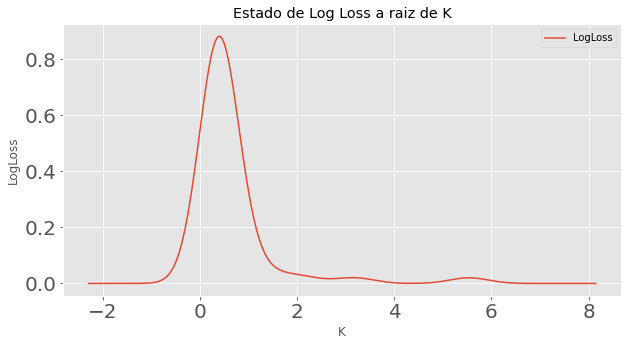

In [452]:
graf1 = error.plot(kind='density', figsize=(10,5), rot=360, title='Estado de Log Loss a raiz de K')
ax = plt.gca()
ax.set_ylabel('LogLoss')
ax.set_xlabel('K')

Log Loss de 0.32, ahora apliquemos al modelo al Dataframe Test

In [453]:
subir = pd.DataFrame()
subir['target'] = pred

subir.describe()

,target
count,1172.000000
mean,0.497579
std,0.379569
min,0.000000
25%,0.162791
50%,0.465116
75%,0.906977
max,1.000000


In [454]:
test.head()

,Unnamed: 0,Region_APAC,Region_Americas,Region_EMEA,Region_Japan,Region_Middle East,Opportunity_ID,Total_Amount,TRF,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr"
0,0,0.0,0.0,1.0,0.0,0.0,10689.0,11.905436,0.0,1.0,1.0
1,1,0.0,0.0,1.0,0.0,0.0,10690.0,11.787392,0.0,1.0,1.0
2,2,0.0,1.0,0.0,0.0,0.0,10691.0,9.954062,0.0,1.0,1.0
3,3,0.0,1.0,0.0,0.0,0.0,10692.0,12.338534,1.0,1.0,1.0
4,4,0.0,1.0,0.0,0.0,0.0,10693.0,8.657390,0.0,0.0,0.0


In [455]:
test.dtypes

Unnamed: 0                              int64
Region_APAC                           float64
Region_Americas                       float64
Region_EMEA                           float64
Region_Japan                          float64
Region_Middle East                    float64
Opportunity_ID                        float64
Total_Amount                          float64
TRF                                   float64
Pricing, Delivery_Terms_Approved      float64
Pricing, Delivery_Terms_Quote_Appr    float64
dtype: object

Lo limpio para que concuerde con el modelo


In [456]:
test_limpio =  test.drop(columns= {'Unnamed: 0'})
test_limpio =  test_limpio.drop(columns= {'Opportunity_ID'})

In [457]:
test_limpio.head()

,Region_APAC,Region_Americas,Region_EMEA,Region_Japan,Region_Middle East,Total_Amount,TRF,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr"
0,0.0,0.0,1.0,0.0,0.0,11.905436,0.0,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0,11.787392,0.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,9.954062,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,12.338534,1.0,1.0,1.0
4,0.0,1.0,0.0,0.0,0.0,8.657390,0.0,0.0,0.0


In [458]:
X = preprocessing.scale(test_limpio)

Finalmente predigo

In [459]:
pred = knn.predict(X)
pred

array([0.93023256, 0.93023256, 0.62790698, ..., 0.62790698, 0.62790698,
       0.13953488])

In [460]:
subir = pd.DataFrame()
subir['Opportunity_ID'] = test['Opportunity_ID']
subir['target'] = pred
subir['Opportunity_ID'] = pd.to_numeric(subir['Opportunity_ID'], downcast='integer')
subir.sort_values('Opportunity_ID',inplace = True)
subir = subir.drop_duplicates('Opportunity_ID',keep = 'last')
subir.set_index('Opportunity_ID', inplace = True)
subir

,target
Opportunity_ID,
10689,0.930233
10690,0.930233
10691,0.627907
10692,0.651163
10693,0.883721
...,...
12364,0.930233
12365,0.627907
12366,0.627907


In [461]:
subir.value_counts()

target  
0.930233    247
0.883721    208
0.953488    165
1.000000    149
0.651163    146
0.627907    134
0.093023     68
0.162791     61
0.488372     55
0.209302     42
0.000000     29
0.860465     28
0.604651     28
0.372093     24
0.139535     22
0.302326     19
0.232558     16
0.186047     14
0.534884     13
0.511628     12
0.813953      9
0.023256      8
0.418605      7
0.976744      6
0.465116      5
0.720930      5
0.558140      4
0.837209      4
0.395349      4
0.069767      4
0.116279      4
0.906977      3
0.767442      3
0.279070      3
0.790698      3
0.348837      3
0.744186      3
0.255814      2
0.325581      2
0.441860      2
0.674419      1
0.697674      1
0.581395      1
dtype: int64

In [462]:
subir.describe()

,target
count,1567.000000
mean,0.685935
std,0.305545
min,0.000000
25%,0.488372
50%,0.860465
75%,0.930233
max,1.000000


In [463]:
csv3 = subir.to_csv('knn_pred_1.csv')
#files.download('knn_pred_1.csv')